In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

In [ ]:
def is_menger(x, y, z):
    while x > 0 or y > 0 or z > 0:
        if x % 3 == 1 and y % 3 == 1 or x % 3 == 1 and z % 3 == 1 or y % 3 == 1 and z % 3 == 1:
            return False
        x //= 3
        y //= 3
        z //= 3
    return True

def menger_sponge(level):
    n = 3**level
    sponge = np.zeros((n, n, n), dtype=bool)
    for x in range(n):
        for y in range(n):
            for z in range(n):
                if is_menger(x, y, z):
                    sponge[x, y, z] = True
    return sponge

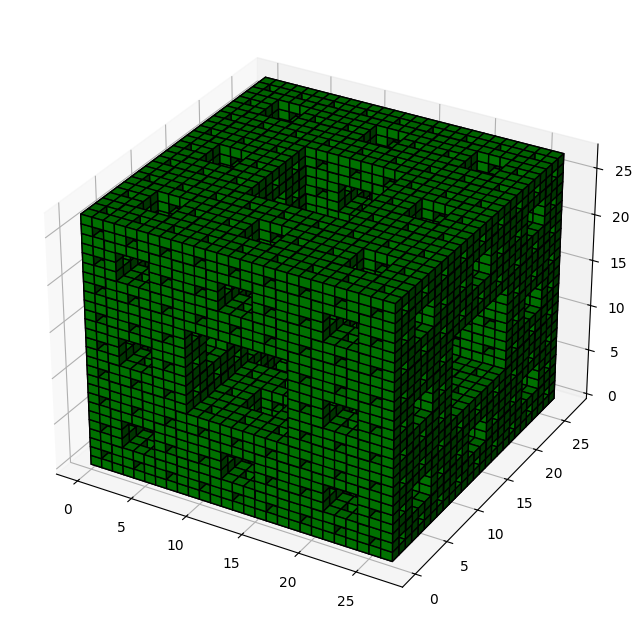

In [ ]:
sponge = menger_sponge(level=3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(sponge, facecolors='green', edgecolor='k')
plt.show()